In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import time

In [2]:
dataset_train = pd.read_csv('../../data/modified/addFeatureTrain.csv')
dataset_test = pd.read_csv('../../data/modified/addFeatureTest.csv')

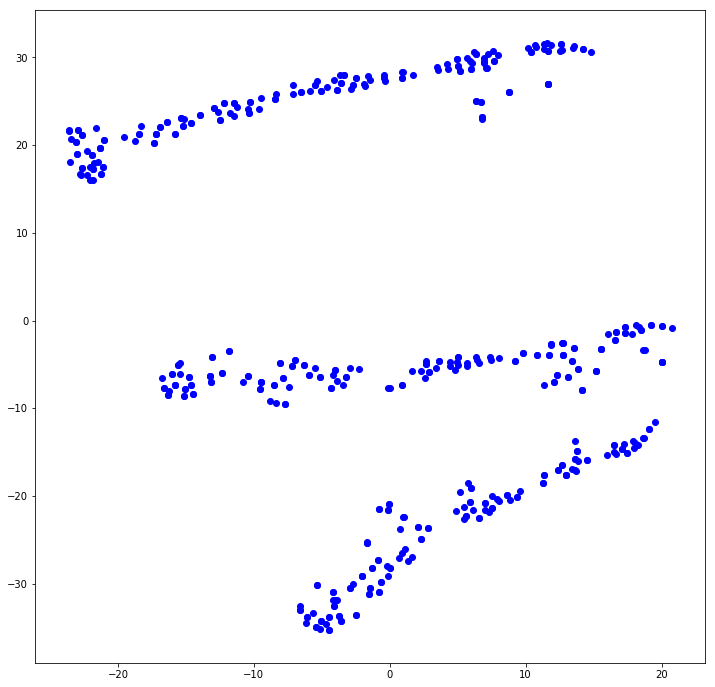

In [3]:
dados = dataset_train.iloc[:500, :280]

from sklearn.manifold import TSNE
mpl.rcParams['figure.figsize'] = (12, 12)
tsne = TSNE(n_components=2)
graf = tsne.fit_transform(dados)

for xis in range(len(graf)):
    plt.scatter(graf[xis][0], graf[xis][1], c='blue')
plt.show()

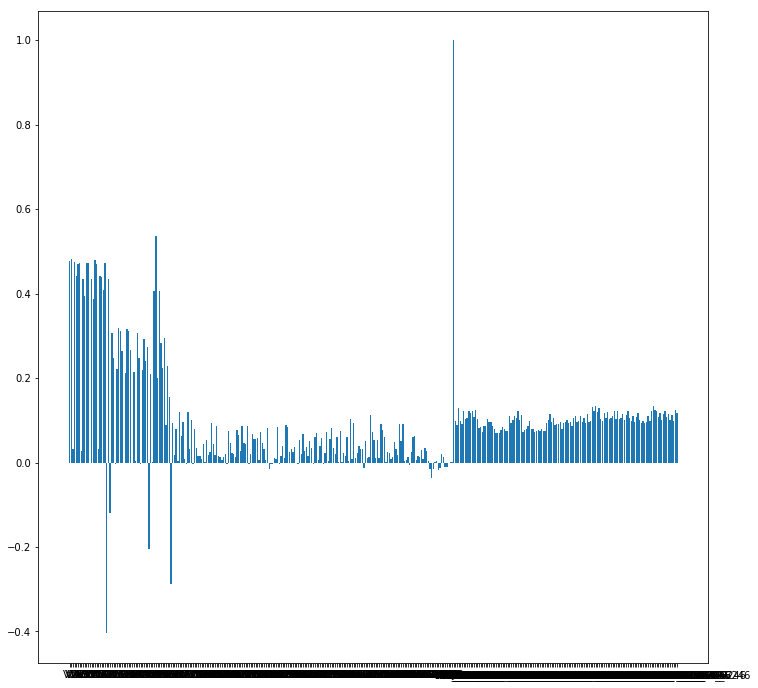

In [4]:
y_aux = dataset_train.corr()["y"] # individual correlation, variables with target
x_aux = dataset_train.columns
plt.bar(x_aux[0:len(y_aux)-1], y_aux[0:len(y_aux)-1])
plt.show()

In [5]:
print(dataset_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52397 entries, 0 to 52396
Columns: 361 entries, V1 to V101_V143_V213_V232_V246
dtypes: float64(361)
memory usage: 144.3 MB
None


In [6]:
x_train = dataset_train.drop(columns=['y'])
y_train = dataset_train['y']

x_test = dataset_test.drop(columns=['y'])
y_test = dataset_test['y']

In [7]:
from sklearn.ensemble import RandomForestRegressor

model_rfg = RandomForestRegressor(n_estimators=100)

init = time.time()
model_rfg.fit(x_train, y_train)
y_pred = model_rfg.predict(x_test)
print('Execution time: {} seconds'.format(str(time.time() - init)))
print('R2 score: {}'.format(model_rfg.score(x_test, y_test)))
print(cross_val_score(model_rfg,x_test, y_test,scoring='r2'))
print('MAE {}'.format(mean_absolute_error(y_test, y_pred)))

Execution time: 264.2314279079437 seconds
R2 score: 0.6324919798689573
[0.64933362 0.62087642 0.62674873]
MAE 0.3677170161815439


In [8]:
from sklearn.model_selection import cross_validate
cv = cross_validate(model_rfg, x_test, y_test, cv=5)
print(cv)

{'score_time': array([0.02779913, 0.02737141, 0.0290792 , 0.02748132, 0.02780581]), 'fit_time': array([21.87259793, 20.4341495 , 20.93886495, 21.89871454, 20.78016925]), 'train_score': array([0.95246229, 0.95321749, 0.95279616, 0.95277232, 0.95304437]), 'test_score': array([0.66641726, 0.62231629, 0.62165258, 0.61253745, 0.62932107])}


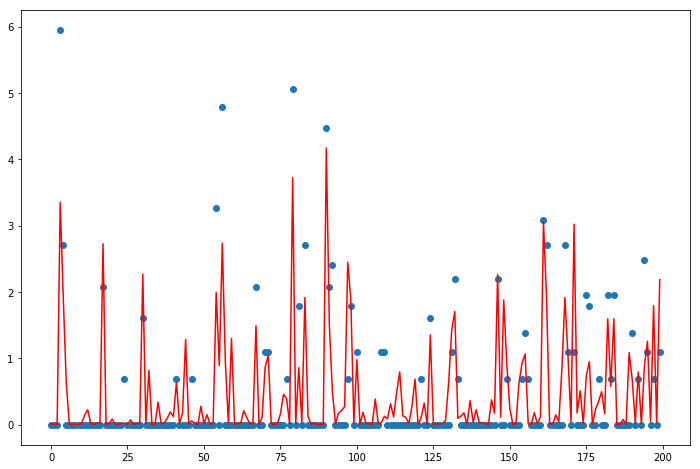

In [9]:
import matplotlib.pyplot as plt
import matplotlib as mpl

x = np.arange(200)
mpl.rcParams['figure.figsize'] = (12, 8)

plt.scatter(x, y_test[:200])
plt.plot(x, y_pred[:200], color='red')
plt.show()